## 1. Imports

In [1]:
# importing packages
import numpy as np
import pandas as pd
import sqlite3
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#retrieving dataframes
%store -r gross
%store -r info
%store -r reviews
%store -r tmdb
%store -r budgets
%store -r movie_basics
%store -r movie_ratings
%store -r movie_genres

In [3]:
# importing database file
conn = sqlite3.connect('Data/im.db')

## 2. Recommendation 1

In [4]:
#here we are joining the info database and the reviews database, using Id column

join_info_reviews = info.merge(reviews, how = 'inner', on='id')

join_info_reviews = join_info_reviews.dropna(subset =['rating_y'])

join_info_reviews.head()

,id,synopsis,rating_x,director,writer,theater_date,dvd_date,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,600000.0,108.0,Entertainment One,A distinctly gallows take on contemporary fina...,0.060,True,PJ Nabarro,0,Patrick Nabarro,2018-11-10
6,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,600000.0,108.0,Entertainment One,"Quickly grows repetitive and tiresome, meander...",0.060,False,Eric D. Snider,0,EricDSnider.com,2013-07-17
7,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,600000.0,108.0,Entertainment One,Cronenberg is not a director to be daunted by ...,0.040,False,Matt Kelemen,0,Las Vegas CityLife,2013-04-21
11,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,600000.0,108.0,Entertainment One,"While not one of Cronenberg's stronger films, ...",0.075,True,Emanuel Levy,0,EmanuelLevy.Com,2013-02-03
12,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,600000.0,108.0,Entertainment One,Robert Pattinson works mighty hard to make Cos...,0.050,False,Christian Toto,0,Big Hollywood,2013-01-15


In [5]:
#just doing this function to get more insight on the data and total number of unique values for each of the columns
#we are performing the nunique function from pandas
join_info_reviews.nunique()

id               1115
synopsis         1098
rating_x            5
director          829
writer            845
theater_date      853
dvd_date          623
box_office        297
runtime           112
studio            161
review          35229
rating_y          109
fresh               2
critic           2512
top_critic          2
publisher         950
date             5605
dtype: int64

In [6]:
#here we are creating two more dataframes that just have director and total fresh each director ever recieved
#the other dataframe is the total rotten review each director has recieved in total
#the dataframe with total fresh each director has is called reveiw_fresh_by_director
#the dataframe with total rotten each director has is called reveiw_rotten_by_director
review_fresh_by_director = join_info_reviews[join_info_reviews['fresh']==True].groupby('director').count()
review_rotten_by_director = join_info_reviews[join_info_reviews['fresh']==False].groupby('director').count()
review_fresh_by_director.reset_index(inplace=True)
review_rotten_by_director.reset_index(inplace=True)
review_fresh_by_director = review_fresh_by_director[['director','fresh']]
review_rotten_by_director = review_rotten_by_director[['director','fresh']]


In [7]:
#here we are printing the top 20 directors with the most positive reviews aka most fresh reviews
director_vs_fresh = pd.DataFrame(review_fresh_by_director)
sorted_df1 = director_vs_fresh.sort_values(by='fresh',ascending=False)
sorted_df1.head(10)


,director,fresh
679,Steven Spielberg,459
116,Clint Eastwood,418
144,David Fincher,343
635,Sam Mendes,271
594,Ridley Scott,256
234,Gore Verbinski,220
446,Martin McDonagh,207
51,Ava DuVernay,198
760,Woody Allen,193
480,Michel Hazanavicius,186


In [8]:
#here we found the average of the data above
#this is so we can see how much of an outlier are theese top 10 directors
np.average(director_vs_fresh['fresh'])

28.937581274382314

In [9]:
#here we found the standard deviation of the data above
#this is so we can see how much of an outlier are theese top 10 directors
np.std(director_vs_fresh['fresh'])


45.131148348306986

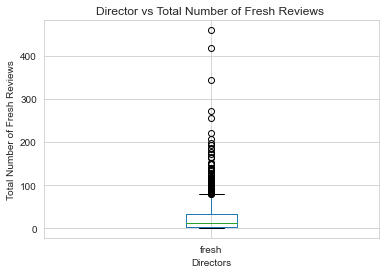

<Figure size 432x288 with 0 Axes>

In [47]:
#boxplot showing the overview of directors to total numbers of fresh reviews
director_vs_fresh.boxplot()

plt.title('Director vs Total Number of Fresh Reviews ')
#plt.legend()

# Set x and y axes labels
plt.xlabel('Directors')
plt.ylabel('Total Number of Fresh Reviews')

#shows the boxplot
plt.show()

#saving this boxplot for the presentation
plt.savefig("Figures/director_vs_TotalNumberFreshReviews",dpi=240,bbox_inches = "tight")

In [11]:
#here we are showing the directors who had the most rotten reviews total for all their movies
director_vs_rotten = pd.DataFrame(review_rotten_by_director)
sorted_df2 = director_vs_rotten.sort_values(by='fresh',ascending=False)
sorted_df2.head(10)

#we are not gonna  find the standard deviation or average here because we are only looking for the best directors
#this below table is a graphic so we can see if any of the directors that had the greatest positive reviews also had the most negative reviews
#for instance, we see Clint Eastwood and Steven Spielsburg in both tables

,director,fresh
111,Clint Eastwood,210
53,Barry Levinson,189
679,Tim Story,150
164,Donald Petrie,147
614,Seth MacFarlane,138
32,Andrzej Bartkowiak,136
35,Ang Lee,121
649,Steven Spielberg,109
410,Marc Forster,108
513,Peter Billingsley,105


In [12]:
#in this cell we are merging the 2 tables we made
#one that has the count for the total fresh reviews per director and the other that has the total rotten reviews per director
#fresh_x is the total count of fresh reviews per director
#fresh_y is the total count of rotten reviews per director
director_vs_rotten = pd.DataFrame(review_rotten_by_director)
director_vs_fresh = pd.DataFrame(review_fresh_by_director)

join_director_vs_fresh_vs_rotten = director_vs_fresh.merge(director_vs_rotten, how = 'inner', on='director')

#now we are making a third column that divides fresh by rotton columns
#the greater the ratio the more fresh to rotten aka the more positive reviews to negative reviews
join_director_vs_fresh_vs_rotten['ratio'] = join_director_vs_fresh_vs_rotten['fresh_x'] / join_director_vs_fresh_vs_rotten['fresh_y']

#here we are sorting the data from the highest ratio to the lowest ratio
sorted_df3 = join_director_vs_fresh_vs_rotten.sort_values(by='ratio',ascending=False)
sorted_df3.head(10)

#as we can see from this data Ava DuVernay has the greatest ratio!
#in addition, Ava was also in the top 10 directors with most fresh reviews as well
#based off these 2 tests it seems she is the most well balanced and highly favored directors

,director,fresh_x,fresh_y,ratio
44,Ava DuVernay,198,2,99.000000
95,Ciro Guerra,76,1,76.000000
283,Joel Coen|Ethan Coen,185,3,61.666667
413,Michel Hazanavicius,186,4,46.500000
479,Peter Lord|Nick Park,84,2,42.000000
219,Howard Hawks,41,1,41.000000
65,Brad Bird,135,4,33.750000
14,Alexander Mackendrick,32,1,32.000000
331,Kelly Fremon Craig,117,4,29.250000
336,Kevin Lima,139,5,27.800000


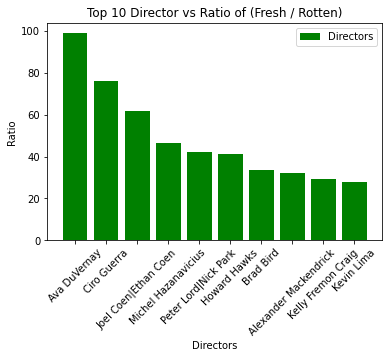

In [13]:
#we want to plot the director verses ratio (fresh to rotten)
plot_director = plt.bar(x ='director', height = 'ratio',data = sorted_df3.iloc[:10], color='green')

plt.xticks(rotation=45)

# set x and y axes labels
plt.xlabel('Directors')
plt.ylabel('Ratio')

#set the title
plt.title('Top 10 Director vs Ratio of (Fresh / Rotten)')

plt.legend(['Directors'])

#saving this boxplot for the presentation
plt.savefig("Figures/director_vs_fresh",dpi=240,bbox_inches = "tight")

In [14]:
#in this cell director_rating will store the average rating of all the movies that each director was involved in
director_rating = join_info_reviews.groupby('director').mean()

#director_rating is being sorted from greatest to smallest
#so, we can see which directors had the greatest average rating to the lowest average rating
sorted_df = director_rating.sort_values(by='rating_y',ascending=False)

sorted_df.head(60)

#as another check for Ava,we looked at the numeric ratings and again she was in the top 60
#60 seems low but this is still the top 6.634% because she was 55 out of 829


,id,box_office,runtime,rating_y,fresh,top_critic
director,,,,,,
Dante Lam,1657.000000,1526248.0,141.000000,0.900000,1.000000,0.000000
Tony Maylam,408.000000,NaN,99.000000,0.500000,0.000000,0.000000
Lo Po-Shan,280.000000,NaN,89.000000,0.420000,0.500000,0.000000
Alexander Medvedkin,832.000000,NaN,69.000000,0.390000,1.000000,0.000000
Roger Young,1000.000000,NaN,105.000000,0.385000,1.000000,0.000000
Roy Ward Baker,38.000000,NaN,96.000000,0.378000,0.200000,0.000000
Alan Bunce,1604.000000,NaN,75.000000,0.340000,0.500000,0.000000
Nattawut Poonpiriya,288.000000,NaN,130.000000,0.314000,0.800000,0.000000
Seijun Suzuki,1891.000000,NaN,89.000000,0.283333,1.000000,0.000000


## 3. Recommendation 2

In this section, we work on finding the best choices of popular actors/actresses to suggest as part of the main cast 
First of all, We will find the optimal number of main characters for the new production.
Then, we will determine which actors are public favorites.

In [15]:
cast_counts_n_ratings = pd.read_sql(""" 
    SELECT 
        a.movie_id,
        cast_count,
        averagerating
    FROM
    (
        SELECT 
            movie_id 
            ,count(distinct person_id) cast_count
        FROM principals
        WHERE category IN ('actor','actress')
            and movie_id IN (SELECT movie_id FROM movie_basics WHERE start_year >= 2015)
        GROUP BY movie_id
    ) as a
    INNER JOIN 
        movie_ratings as mr
    on a.movie_id = mr.movie_id
""",conn)

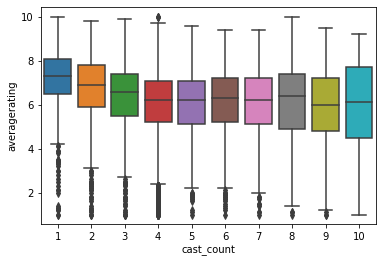

In [16]:
sns.boxplot(x ="cast_count", y ="averagerating",
            data = cast_counts_n_ratings);
plt.savefig("Figures/cast_counts_average_ratings",dpi=240,bbox_inches = "tight")

If we calculate the pearson coefficient of **cast_count** vs **averagerating** we get the following

In [17]:
corr, _ = stats.pearsonr(list(cast_counts_n_ratings['cast_count']),list(cast_counts_n_ratings['averagerating']))
print('pearson :',round(corr,3))

pearson : -0.096


Therefore, there is no relation between the number of main characters (principal actors/actresses) and the average rating of the movies. 
Then we can stick to choose as many as the average number of actors 

Then, we will be sugesting to have as many as overall mean number of actors/actresses in the movie

Mean:  4.17
Standard dev:  1.33


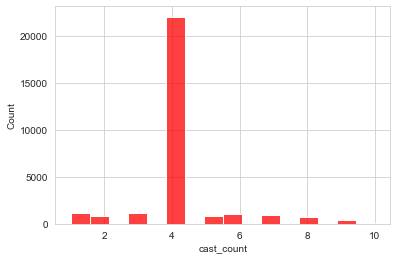

In [18]:
#cast_counts_n_ratings.set_index('movie_id',inplace = True)
sns.set_style('whitegrid')
sns.histplot(cast_counts_n_ratings['cast_count'], kde = False, color ='red', bins = 'auto')
print('Mean: ',round(cast_counts_n_ratings['cast_count'].mean(),2));
#print('Mode: ',cast_counts_n_ratings['cast_count'].mode(),2);
print('Standard dev: ',round(cast_counts_n_ratings['cast_count'].std(),2));

plt.savefig("Figures/cast_counts_hist",dpi=240,bbox_inches = "tight")

Based on the popularity (the total number of reviews an actor has), and sorting by average rating of the movies they have been on in the latest years (> 2015) we can sugest a list of the best actors/actresses to choose form.

In [19]:
conn = sqlite3.connect('Data/im.db')

act_base = pd.read_sql("""
    SELECT 
        ps.person_id
        ,ps.primary_name
        ,category
        ,avg(mr.averagerating)/10 as avg_rating
        ,sum(mr.numvotes) as total_ratings
    FROM principals as pr
    INNER JOIN
        persons as ps
        on ps.person_id = pr.person_id
    INNER JOIN 
        movie_ratings as mr
        on mr.movie_id = pr.movie_id
    WHERE pr.category IN ('actor','actress')
            and death_year is NUll
            and mr.movie_id IN (SELECT movie_id FROM movie_basics WHERE start_year >= 2015)
    GROUP BY 
        ps.person_id
        ,ps.primary_name
    HAVING sum(mr.numvotes)>20
    ORDER BY
        total_ratings DESC
        ,avg_rating DESC
""",conn)

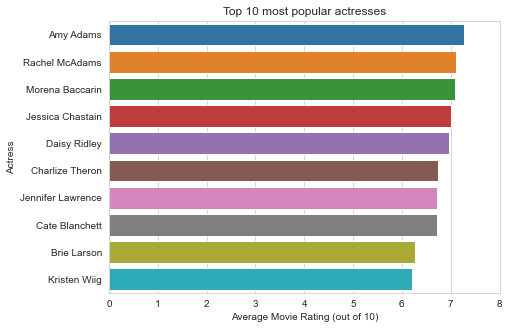

In [20]:
dt = act_base[act_base['category']=='actress'].iloc[:10].sort_values(by=['avg_rating'], ascending = False);
plt.figure(figsize=(7,5));
sns.barplot(x='avg_rating', y='primary_name', data = dt );
plt.xlabel('Average Movie Rating (out of 10)');
plt.xticks([a/10 for a in list(range(9))], list(range(9))) ;
plt.ylabel('Actress');
plt.title('Top 10 most popular actresses');
plt.savefig("Figures/top10actresses",dpi=240,bbox_inches = "tight")

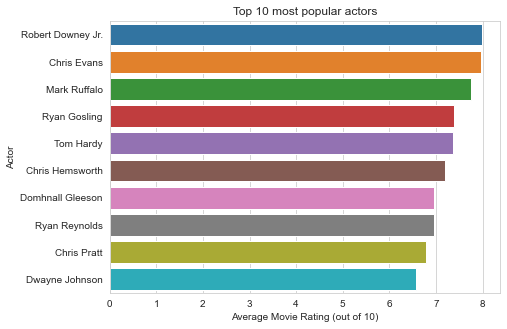

In [21]:
dt = act_base[act_base['category']=='actor'].iloc[:10].sort_values(by=['avg_rating'], ascending = False)
plt.figure(figsize=(7,5));
sns.barplot(x='avg_rating', y='primary_name', data = dt );
plt.xlabel('Average Movie Rating (out of 10)');
plt.xticks([a/10 for a in list(range(9))], list(range(9))) ;
plt.ylabel('Actor');
plt.title('Top 10 most popular actors');
plt.savefig("Figures/top10actors",dpi=240,bbox_inches = "tight")

We suggest to select a total of 4 people to form the principal cast.
The above barplots show the most popular actors and acresses ordered by the average rating of the movies they participated in 

Now we will findout which of them have worked together before 

In [22]:
recomendations = pd.read_sql("""
    WITH act_base as (
    SELECT 
        ps.person_id
        ,ps.primary_name
        ,category
        ,avg(mr.averagerating)/10 as avg_rating
        ,sum(mr.numvotes) as total_ratings
    FROM principals as pr
    INNER JOIN
        persons as ps
        on ps.person_id = pr.person_id
    INNER JOIN 
        movie_ratings as mr
        on mr.movie_id = pr.movie_id
    WHERE pr.category IN ('actor','actress')
            and death_year is NUll
            and mr.movie_id IN (SELECT movie_id FROM movie_basics WHERE start_year >= 2015)
    GROUP BY 
        ps.person_id
        ,ps.primary_name
    HAVING sum(mr.numvotes)>20
    ORDER BY
        total_ratings DESC
        ,avg_rating DESC
    )
    SELECT 
        principals.person_id
        ,primary_name
        ,movie_id
    FROM 
        principals
    INNER JOIN 
        persons
        on principals.person_id = persons.person_id
    WHERE 
        principals.person_id IN (SELECT person_id 
                                  FROM act_base 
                                  WHERE category = 'actor' 
                                  ORDER BY total_ratings DESC 
                                  LIMIT 10)
        OR principals.person_id IN (SELECT person_id 
                                     FROM act_base 
                                     WHERE category = 'actress' 
                                     ORDER BY total_ratings DESC 
                                     LIMIT 10)
    
""",conn)

The **recomendations** dataframe contains the list of actors and actresses we recomended and their respective movie participations

In [23]:
recomendations

,person_id,primary_name,movie_id
0,nm0010736,Amy Adams,tt1216492
1,nm1325419,Kristen Wiig,tt1478338
2,nm1046097,Rachel McAdams,tt1605783
3,nm0262635,Chris Evans,tt1706620
4,nm5397459,Daisy Ridley,tt2076822
...,...,...,...
354,nm1165110,Chris Hemsworth,tt8698020
355,nm0749263,Mark Ruffalo,tt7874330
356,nm1727304,Domhnall Gleeson,tt8376234
357,nm0010736,Amy Adams,tt6266538


The next chunk of code builds a matrix of actor/actress vs actor/actress that asigns the value of **1** if two actors/actresses have participated in the same movie before (since 2015), and 0 if not. 

In [24]:
#
act_dict = {'name':list(recomendations.primary_name.unique())}    
for act in act_dict['name']:
    act_dict[act] = []
    person_column_movies = list(recomendations[recomendations.primary_name == act].movie_id.unique())
    for act_match in list(recomendations.primary_name.unique()):
        movies_match_cnt = 0
        for movie in list(recomendations[recomendations.primary_name == act_match].movie_id.unique()):
            if movie in person_column_movies:
                movies_match_cnt += 1
            
        if movies_match_cnt > 0:
            act_dict[act].append(1)
        else :
            act_dict[act].append(0)    

In [25]:
pd.DataFrame.from_dict(act_dict)

,name,Amy Adams,Kristen Wiig,Rachel McAdams,Chris Evans,Daisy Ridley,Robert Downey Jr.,Dwayne Johnson,Chris Pratt,Jessica Chastain,...,Mark Ruffalo,Ryan Gosling,Domhnall Gleeson,Chris Hemsworth,Jennifer Lawrence,Cate Blanchett,Charlize Theron,Tom Hardy,Morena Baccarin,Brie Larson
0,Amy Adams,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,Kristen Wiig,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,Rachel McAdams,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,Chris Evans,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,Daisy Ridley,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,Robert Downey Jr.,0,0,1,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
6,Dwayne Johnson,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Chris Pratt,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
8,Jessica Chastain,0,1,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
9,Ryan Reynolds,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 4. Recommendation 3

In [26]:
movie_genres

,movie_id,genre,table_match
0,63540,NaN,movie_basics
1,66787,NaN,movie_basics
2,69049,Drama,movie_basics
3,69204,NaN,movie_basics
4,100275,NaN,movie_basics
...,...,...,...
47827,381231,Action and Adventure,tmdb
47829,366854,Kids and Family,tmdb
47830,366854,Action and Adventure,tmdb
47832,309885,Mystery and Suspense,tmdb


In [27]:
#Selecting only rows where table_match = movie_basics
mbg= movie_genres.loc[(movie_genres.table_match == "movie_basics")]
mbg

,movie_id,genre,table_match
0,63540,NaN,movie_basics
1,66787,NaN,movie_basics
2,69049,Drama,movie_basics
3,69204,NaN,movie_basics
4,100275,NaN,movie_basics
...,...,...,...
146139,9916538,Drama,movie_basics
146140,9916622,Documentary,movie_basics
146141,9916706,Comedy,movie_basics
146142,9916730,NaN,movie_basics


In [28]:
#combining movie_basics with movie_reviews
movieBasicRating = movie_basics.merge(movie_ratings, on = 'movie_id')
movieBasicRating

,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes
0,63540,Sunghursh,Sunghursh,2013,175.0,7.0,77
1,66787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43
2,69049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,6.9,4517
3,69204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,6.1,13
4,100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,6.5,119
...,...,...,...,...,...,...,...
73851,9913084,Diabolik sono io,Diabolik sono io,2019,75.0,6.2,6
73852,9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,8.7,136
73853,9914642,Albatross,Albatross,2017,NaN,8.5,8
73854,9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,6.6,5


In [29]:
#combining the movieBasicsGenres table with movieBasicRating table
movieBasicsGenres = mbg.merge(movieBasicRating, on = 'movie_id')
movieBasicsGenres

,movie_id,genre,table_match,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes
0,63540,NaN,movie_basics,Sunghursh,Sunghursh,2013,175.0,7.0,77
1,66787,NaN,movie_basics,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43
2,69049,Drama,movie_basics,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,6.9,4517
3,69204,NaN,movie_basics,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,6.1,13
4,100275,NaN,movie_basics,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,9913084,Documentary,movie_basics,Diabolik sono io,Diabolik sono io,2019,75.0,6.2,6
73852,9914286,NaN,movie_basics,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,8.7,136
73853,9914642,Documentary,movie_basics,Albatross,Albatross,2017,NaN,8.5,8
73854,9914942,NaN,movie_basics,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,6.6,5


In [30]:
#dropping unwanted columns 
genreRankings = movieBasicsGenres[['movie_id', 'genre', 'primary_title', 'averagerating', 'numvotes']]
genreRankings

#drop rows where genre is null 
gR = genreRankings.dropna()
gR.value_counts('genre')


genre
Drama                          11612
Documentary                    10313
Comedy                          5613
Horror                          2692
Mystery and Suspense            2012
Action and Adventure            1202
Romance                          717
Kids and Family                  491
Science Fiction and Fantasy      442
Animation                        348
Music                            308
Biography                        163
History                          106
Sports and Fitness                88
Western                           75
TV Show                           10
dtype: int64

In [31]:
#getting the average rating of movies in each genre
gRGrouped = gR.groupby('genre').mean().reset_index()
gRGrouped

#deleting unwanted columns 
gRg = gRGrouped[['genre', 'averagerating']]

#changing column name 
rating = gRg.rename(columns ={"averagerating":"averageRatingPerGenre"})
rating

,genre,averageRatingPerGenre
0,Action and Adventure,5.847837
1,Animation,5.908621
2,Biography,6.858896
3,Comedy,5.777998
4,Documentary,7.293794
5,Drama,6.494265
6,History,6.605660
7,Horror,4.835475
8,Kids and Family,6.078004
9,Music,7.241558


In [32]:
#getting the count of movies in each genre
gRCount =gR.groupby('genre').count().reset_index()
gRCount

#dropping unnecessary columns 
gRc = gRCount[['genre', 'movie_id']]
gRc

#changing column name 
count = gRc.rename(columns ={"movie_id":"count"})
count

,genre,count
0,Action and Adventure,1202
1,Animation,348
2,Biography,163
3,Comedy,5613
4,Documentary,10313
5,Drama,11612
6,History,106
7,Horror,2692
8,Kids and Family,491
9,Music,308


In [33]:
#combining table with average rating and count per genre
genreRat = count.merge(rating, on = 'genre')
genreRat


,genre,count,averageRatingPerGenre
0,Action and Adventure,1202,5.847837
1,Animation,348,5.908621
2,Biography,163,6.858896
3,Comedy,5613,5.777998
4,Documentary,10313,7.293794
5,Drama,11612,6.494265
6,History,106,6.605660
7,Horror,2692,4.835475
8,Kids and Family,491,6.078004
9,Music,308,7.241558


In [34]:
genreRatingCount = genreRat.rename(columns ={"genre":"Genre"})
genreRatingCount

,Genre,count,averageRatingPerGenre
0,Action and Adventure,1202,5.847837
1,Animation,348,5.908621
2,Biography,163,6.858896
3,Comedy,5613,5.777998
4,Documentary,10313,7.293794
5,Drama,11612,6.494265
6,History,106,6.605660
7,Horror,2692,4.835475
8,Kids and Family,491,6.078004
9,Music,308,7.241558


In [35]:
####Showing all Genres 

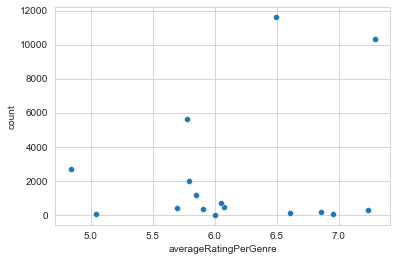

In [36]:
#creating a scatterplot of all genres
sns.scatterplot(data=genreRatingCount, x='averageRatingPerGenre', y='count')
plt.savefig("Figures/averageRatingPerGenre",dpi=240,bbox_inches="tight")

In [37]:
######Showing genres with average score > 6.5 and count < 350

In [38]:
#creating a scatterplot when average ratings are > 6.5

#filtering movies with rating > 6 .5
filter = genreRatingCount['averageRatingPerGenre'] > 6.5
topRankings= genreRatingCount[filter]
print(topRankings)



                 Genre  count  averageRatingPerGenre
2            Biography    163               6.858896
4          Documentary  10313               7.293794
6              History    106               6.605660
9                Music    308               7.241558
13  Sports and Fitness     88               6.956818


In [39]:
#filtering movies with count < 10000
filt = topRankings['count']< 350
topGenres =topRankings[filt]
print(topGenres)


                 Genre  count  averageRatingPerGenre
2            Biography    163               6.858896
6              History    106               6.605660
9                Music    308               7.241558
13  Sports and Fitness     88               6.956818


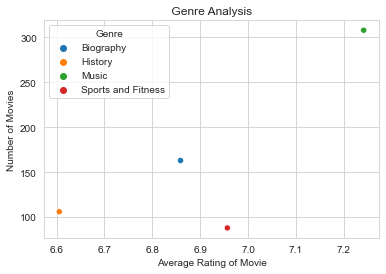

In [40]:
#creating a scatterplot of the top 5 genres
ax = sns.scatterplot(data=topGenres,
                x='averageRatingPerGenre',
                y='count', 
                hue = 'Genre')

ax.set(xlabel = "Average Rating of Movie",
      ylabel = "Number of Movies",
      title = " Genre Analysis ")
plt.savefig("Figures/averageRatingOfMovie",dpi=240,bbox_inches = "tight")

## 5. Hypothesis Testing

In [41]:
#H_0: Movies that fall in the music genre do not have 
# higher average rating than movies in other genres

#H_1: Movies that fall in the music genre have significantly higher
## average ratings compared to other movie genres


In [42]:
gR

,movie_id,genre,primary_title,averagerating,numvotes
2,69049,Drama,The Other Side of the Wind,6.9,4517
7,146592,Drama,Pál Adrienn,6.8,451
8,154039,History,So Much for Justice!,4.6,64
9,159369,Documentary,Cooper and Hemingway: The True Gen,7.6,53
10,162942,Drama,Children of the Green Dragon,6.9,120
...,...,...,...,...,...
73849,9911774,Drama,Padmavyuhathile Abhimanyu,8.4,365
73850,9913056,Documentary,Swarm Season,6.2,5
73851,9913084,Documentary,Diabolik sono io,6.2,6
73853,9914642,Documentary,Albatross,8.5,8


In [43]:
mean = gR.averagerating.mean()
std = gR.averagerating.std()
count = len(gR[gR['genre']=='Music'])
alpha = 0.05
sampleMean = gR[gR['genre']=='Music'].averagerating.mean()

In [44]:
import math

z = (mean-sampleMean)/(std/math.sqrt(count))
z

-9.723817414188751

In [45]:
import scipy.stats as stats
# Assign this to True or False
print('p-value' ,stats.norm.cdf(z))
print('alpha',alpha)
reject_null_hypothesis = stats.norm.cdf(z)<alpha

p-value 1.1933119745282744e-22
alpha 0.05


In [46]:
reject_null_hypothesis

True